## Instala el paquete kaggle

In [1]:
!pip install kaggle --quiet

## Sube tu archivo de credenciales kaggle.json

In [2]:
from google.colab import files
files.upload()  # Selecciona tu kaggle.json cuando aparezca el diálogo

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aldog14","key":"7d7ec6a4c0548380b064d2b5e58d872d"}'}

## Configura la variable de entorno para la API de Kaggle

In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'  # Coloca el kaggle.json en /content

## Descarga el ZIP del dataset

In [4]:
!kaggle datasets download -d kouroshalizadeh/history-of-philosophy

# Descomprime todo en la carpeta `data/`
!unzip history-of-philosophy.zip -d data/

Dataset URL: https://www.kaggle.com/datasets/kouroshalizadeh/history-of-philosophy
License(s): unknown
  0% 0.00/55.1M [00:00<?, ?B/s]
100% 55.1M/55.1M [00:00<00:00, 1.11GB/s]
Archive:  history-of-philosophy.zip
  inflating: data/philosophy_data.csv  


## Carga el CSV en un DataFrame de pandas

In [9]:
import pandas as pd

# Carga el CSV
df = pd.read_csv('data/philosophy_data.csv')

# Revisa las primeras filas
print(df.head())

                    title author school  \
0  Plato - Complete Works  Plato  plato   
1  Plato - Complete Works  Plato  plato   
2  Plato - Complete Works  Plato  plato   
3  Plato - Complete Works  Plato  plato   
4  Plato - Complete Works  Plato  plato   

                                      sentence_spacy  \
0   What's new, Socrates, to make you leave your ...   
1  Surely you are not prosecuting anyone before t...   
2  The Athenians do not call this a prosecution b...   
3                              What is this you say?   
4  Someone must have indicted you, for you are no...   

                                        sentence_str  \
0   What's new, Socrates, to make you leave your ...   
1  Surely you are not prosecuting anyone before t...   
2  The Athenians do not call this a prosecution b...   
3                              What is this you say?   
4  Someone must have indicted you, for you are no...   

   original_publication_date  corpus_edition_date  sentence_length 

## Información general y estadísticas descriptivas

In [10]:
print(df.info())

# Estadísticas descriptivas de columnas numéricas
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360808 entries, 0 to 360807
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   title                      360808 non-null  object
 1   author                     360808 non-null  object
 2   school                     360808 non-null  object
 3   sentence_spacy             360808 non-null  object
 4   sentence_str               360808 non-null  object
 5   original_publication_date  360808 non-null  int64 
 6   corpus_edition_date        360808 non-null  int64 
 7   sentence_length            360808 non-null  int64 
 8   sentence_lowered           360808 non-null  object
 9   tokenized_txt              360808 non-null  object
 10  lemmatized_str             360808 non-null  object
dtypes: int64(3), object(8)
memory usage: 30.3+ MB
None
       original_publication_date  corpus_edition_date  sentence_length
count              360808.000000  

# Muestra la lista de columnas y las primeras filas para entender tu estructura

In [12]:
print(df.columns.tolist())
print(df.head())


['title', 'author', 'school', 'sentence_spacy', 'sentence_str', 'original_publication_date', 'corpus_edition_date', 'sentence_length', 'sentence_lowered', 'tokenized_txt', 'lemmatized_str']
                    title author school  \
0  Plato - Complete Works  Plato  plato   
1  Plato - Complete Works  Plato  plato   
2  Plato - Complete Works  Plato  plato   
3  Plato - Complete Works  Plato  plato   
4  Plato - Complete Works  Plato  plato   

                                      sentence_spacy  \
0   What's new, Socrates, to make you leave your ...   
1  Surely you are not prosecuting anyone before t...   
2  The Athenians do not call this a prosecution b...   
3                              What is this you say?   
4  Someone must have indicted you, for you are no...   

                                        sentence_str  \
0   What's new, Socrates, to make you leave your ...   
1  Surely you are not prosecuting anyone before t...   
2  The Athenians do not call this a prosecutio

In [13]:
import pandas as pd

# 1. Como los años BCE no encajan bien en datetime, déjalos como enteros:
df['original_publication_date'] = df['original_publication_date'].astype('Int64')

# 2. Convierte corpus_edition_date a datetime (solo año):
df['corpus_edition_date'] = pd.to_datetime(
    df['corpus_edition_date'].astype(str),
    format='%Y',
    errors='coerce'
)

In [14]:
# Verifica:
print(df.dtypes[['original_publication_date','corpus_edition_date']])

original_publication_date             Int64
corpus_edition_date          datetime64[ns]
dtype: object


# Valores nulos + Rango de años


In [15]:
print(df[['original_publication_date','corpus_edition_date']].isnull().sum())

print("Original publication:", df['original_publication_date'].min(), "a", df['original_publication_date'].max())
print("Corpus edition:     ", df['corpus_edition_date'].dt.year.min(), "a", df['corpus_edition_date'].dt.year.max())


original_publication_date    0
corpus_edition_date          0
dtype: int64
Original publication: -350 a 1985
Corpus edition:      1887 a 2016


# Histograma de sentence_length

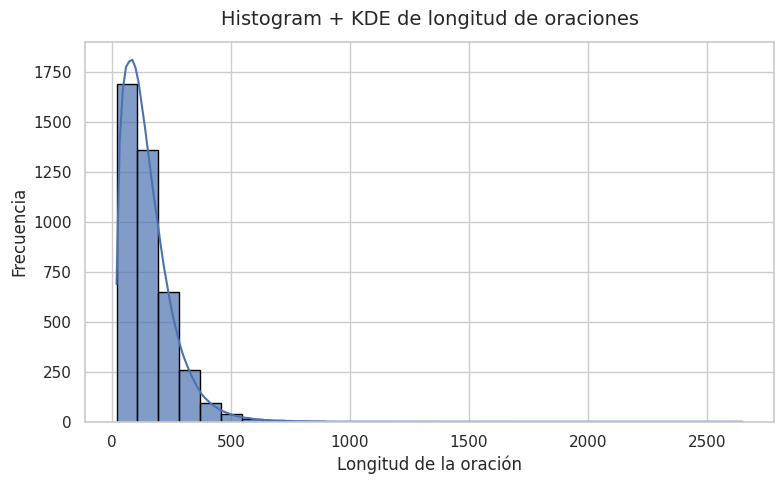

In [31]:
import seaborn as sns

sns.set_theme(style='whitegrid')                # estilo general
plt.figure(figsize=(8,5))
sns.histplot(
    df['sentence_length'],
    bins=30,
    kde=True,                                   # añade curva de densidad
    stat='frequency',                           # frecuencia en eje Y
    edgecolor='black',
    alpha=0.7
)
plt.title('Histogram + KDE de longitud de oraciones', fontsize=14, pad=12)
plt.xlabel('Longitud de la oración', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.tight_layout()
plt.show()


## Top autores y escuelas

In [17]:
print(df['author'].value_counts().head())
print(df['school'].value_counts().head())

author
Aristotle    48779
Plato        38366
Hegel        22700
Foucault     15240
Heidegger    15239
Name: count, dtype: int64
school
analytic           55425
aristotle          48779
german_idealism    42136
plato              38366
continental        33779
Name: count, dtype: int64


# Top 5 Authors

In [33]:
import matplotlib.pyplot as plt

# Aplica un estilo estético
plt.style.use('ggplot')

# Función auxiliar para anotar cada barra con su valor
def annotate_bars(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(
            f'{height}',
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 4),
            textcoords="offset points",
            ha='center',
            va='bottom',
            fontsize=10
        )


# Gráfica Top 5 Autores

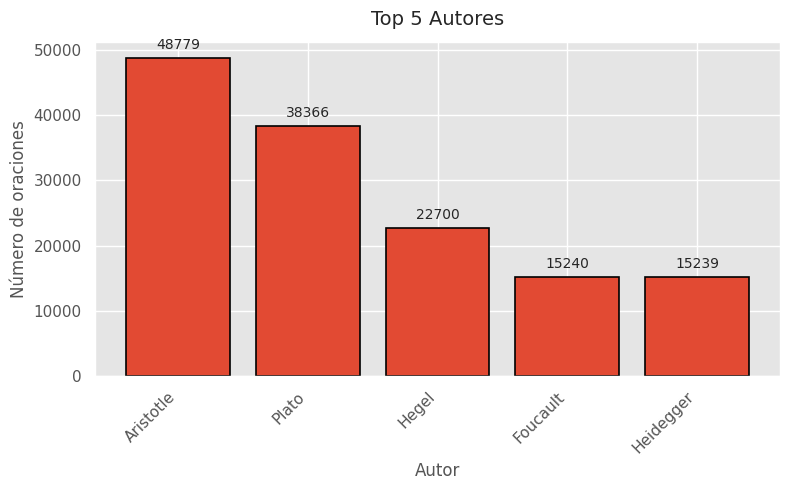

In [34]:
top_authors = df['author'].value_counts().head()
fig, ax = plt.subplots(figsize=(8, 5))
bars_auth = ax.bar(top_authors.index, top_authors.values, edgecolor='black', linewidth=1.2)
annotate_bars(ax, bars_auth)
ax.set_title('Top 5 Autores', fontsize=14, pad=12)
ax.set_xlabel('Autor', fontsize=12)
ax.set_ylabel('Número de oraciones', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gráfica Top 5 Escuelas

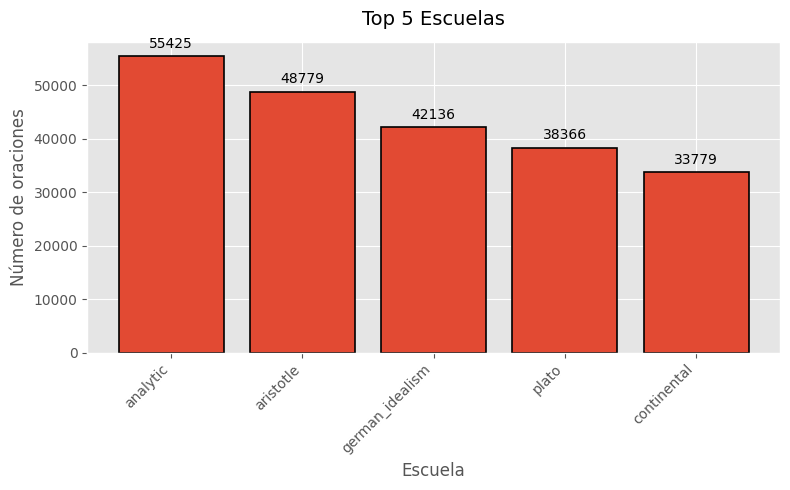

In [21]:
import matplotlib.pyplot as plt

# El mismo estilo
plt.style.use('ggplot')

top_schools = df['school'].value_counts().head()
fig, ax = plt.subplots(figsize=(8, 5))
bars_sch = ax.bar(top_schools.index, top_schools.values, edgecolor='black', linewidth=1.2)
annotate_bars(ax, bars_sch)
ax.set_title('Top 5 Escuelas', fontsize=14, pad=12)
ax.set_xlabel('Escuela', fontsize=12)
ax.set_ylabel('Número de oraciones', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


 ## DataFrame ordenado

In [40]:
import pandas as pd

top_df = (
    df['sentence_str']
      .value_counts()
      .head(100)
      .reset_index()
      .rename(columns={'index':'quote', 'sentence_str':'count'})
)

top_df

,count,count
0,This strategy calls into question the validity...,1
1,"What's new, Socrates, to make you leave your ...",1
2,Surely you are not prosecuting anyone before t...,1
3,The Athenians do not call this a prosecution b...,1
4,What is this you say?,1
...,...,...
95,"Well then, what is dear to the gods is pious, ...",1
96,That is what I want.,1
97,"If that is how you want it, Socrates, that is ...",1
98,"is pious, and if it is not that it is not.",1
